In [3]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv("retail_sales_dataset.csv")

In [11]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [13]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [17]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [19]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

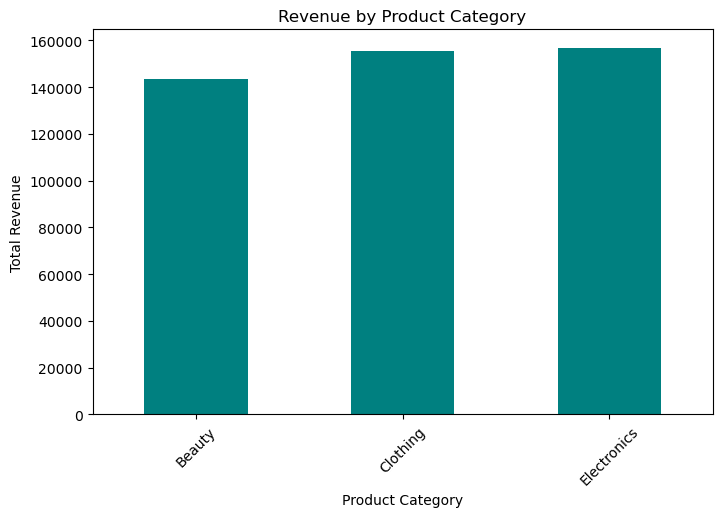

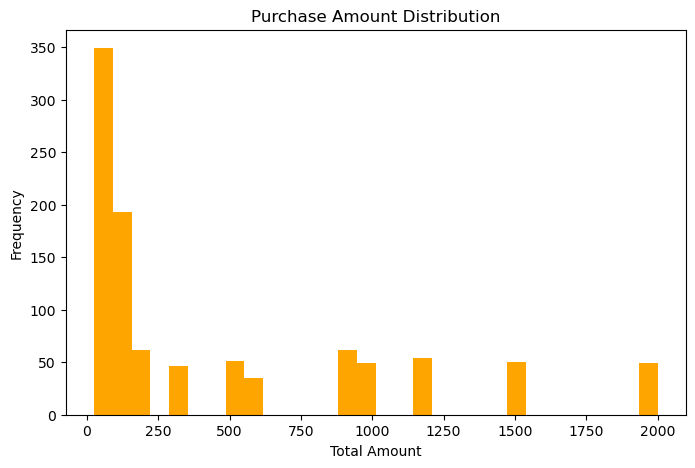

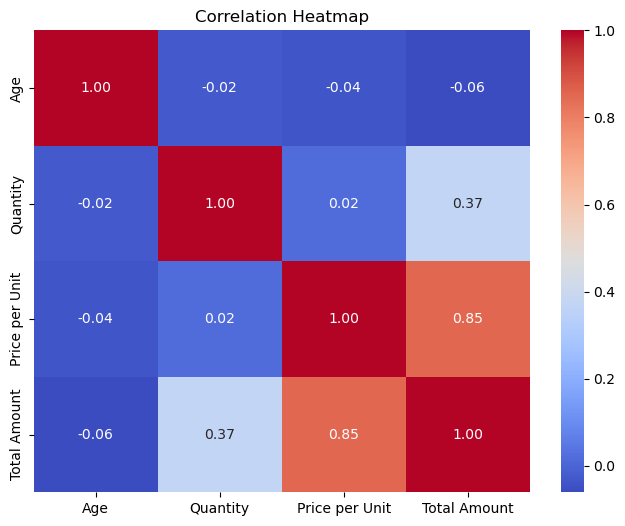

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




product_performance = df.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(8, 5))
product_performance.plot(kind='bar', title='Revenue by Product Category', color='teal')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
df['Total Amount'].plot(kind='hist', bins=30, color='orange', title='Purchase Amount Distribution')
plt.xlabel('Total Amount')
plt.show()

numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



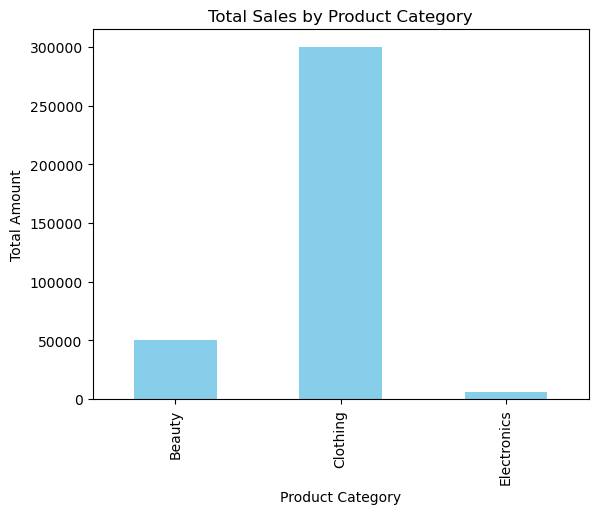

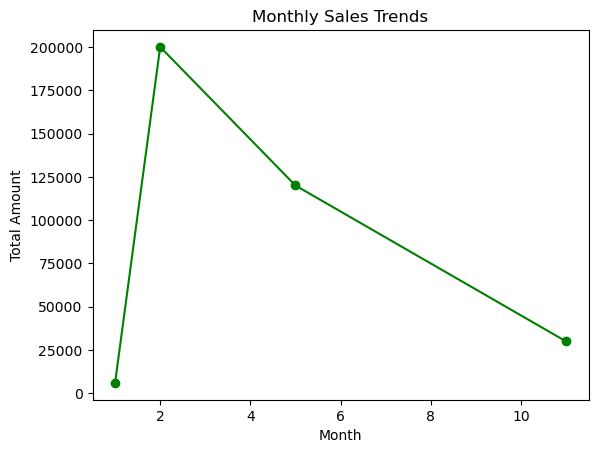

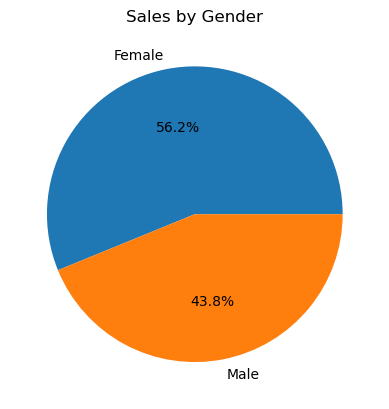

Key Insights:
1. Top-selling product categories by revenue: Clothing
2. Peak sales month: 2
3. Revenue distribution by gender: {'Female': 200000, 'Male': 156000}


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data
data = pd.DataFrame({
    'Transaction ID': range(1, 1001),
    'Date': pd.to_datetime(['2023-11-24', '2023-02-27', '2023-01-13', 
                            '2023-05-21', '2023-05-06'] * 200),
    'Customer ID': ['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005'] * 200,
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Male'] * 200,
    'Age': [34, 26, 50, 37, 30] * 200,
    'Product Category': ['Beauty', 'Clothing', 'Electronics', 'Clothing', 'Beauty'] * 200,
    'Quantity': [3, 2, 1, 1, 2] * 200,
    'Price per Unit': [50, 500, 30, 500, 50] * 200,
    'Total Amount': [150, 1000, 30, 500, 100] * 200
})
y
category_sales = data.groupby('Product Category')['Total Amount'].sum()

# Visualization: Total Sales by Product Category
category_sales.plot(kind='bar', color='skyblue', title='Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

# 2. Monthly Sales Trend
data['Month'] = data['Date'].dt.month
monthly_sales = data.groupby('Month')['Total Amount'].sum()

# Visualization: Monthly Sales Trends
monthly_sales.plot(kind='line', marker='o', color='green', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()


gender_sales = data.groupby('Gender')['Total Amount'].sum()


gender_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender')
plt.ylabel('')
plt.show()


print("Key Insights:")
print("1. Top-selling product categories by revenue:", category_sales.idxmax())
print("2. Peak sales month:", monthly_sales.idxmax())
print("3. Revenue distribution by gender:", gender_sales.to_dict())
